In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_covtype

In [2]:
import time

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# load dataset
ds = fetch_covtype()

In [5]:
# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(ds.data, columns=ds.feature_names)

In [6]:
# Add the target variable to the dataframe
df['Cover_Type'] = ds.target
# Extract features and target

In [7]:
y = df['Cover_Type']  # output variable
x = df.drop(['Cover_Type'], axis=1)  # features to drop

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)  # set training and test data

In [9]:
# Start a timer for calculating the elapsed time to perform feature selection with 
# Correlation technique.
cor_start_time = time.time()

threshold = 0.5  # Define threshold
corr_matrix = x.corr().abs()  # Absolute value correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# End timer
cor_end_time = time.time()
# Compute elapsed time
cor_elapsed_time = cor_end_time - cor_start_time
print("Time taken for Correlation's feature selection:", cor_elapsed_time, "seconds")

Time taken for Correlation's feature selection: 24.697028636932373 seconds


In [14]:
to_drop

['Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Soil_Type_28']

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # standardize the data
X_test = sc.transform(X_test)  # standardize the data

In [11]:
# Start a timer for calculating the elapsed time to perform classifing with Correlation technique.
cor1_start_time = time.time()

classifier = KNeighborsClassifier()  # base model
classifier.fit(X_train, y_train)  # train model with 4 principal components

# End timer
cor1_end_time = time.time()
# Compute elapsed time
cor1_elapsed_time = cor1_end_time - cor1_start_time
print("Time taken for KNeighborsClassifier to perform classifing on Correlation:", cor1_elapsed_time, "seconds")

Time taken for KNeighborsClassifier to perform classifing on Correlation: 0.10701632499694824 seconds


In [12]:
score = classifier.score(X_test, y_test)  # get accuracy
print("Accuracy: ", score)

Accuracy:  0.9272304186488403


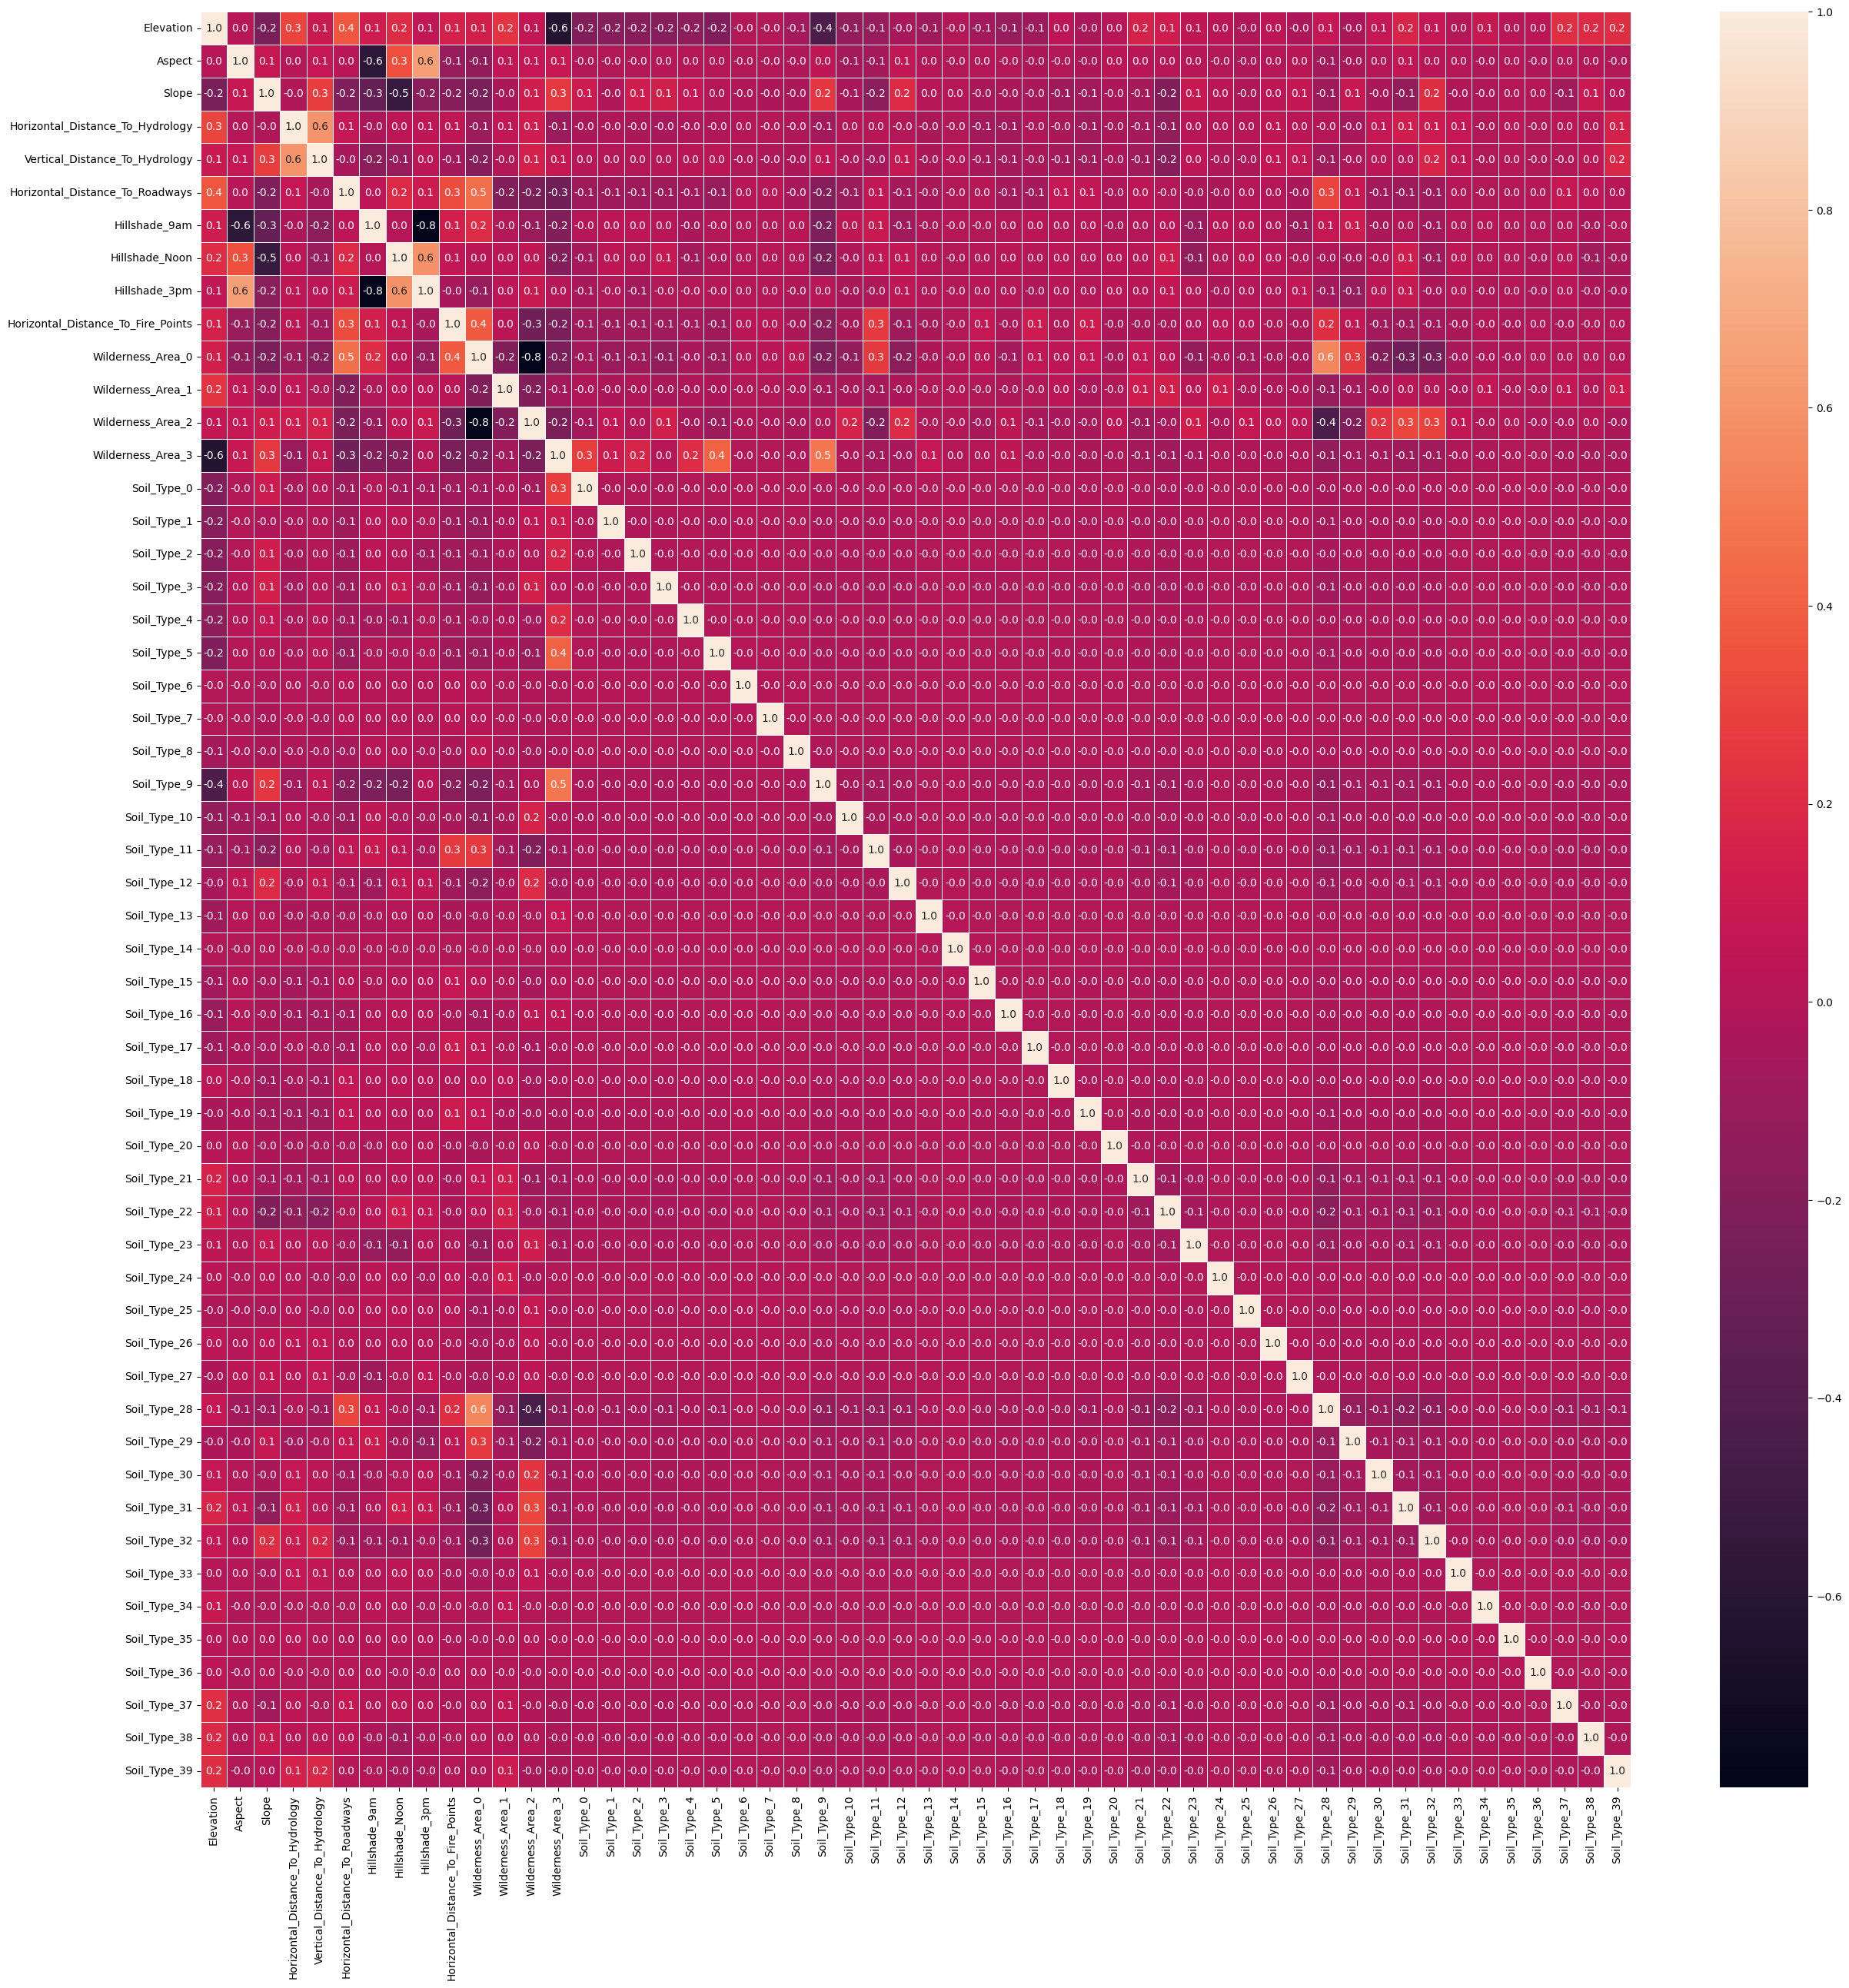

In [13]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)  # build correlation heatmap
plt.show()  # show heatmap